# PART 1: INTRODUCTION TO EXPLORATORY ANALYSIS

# Overview

Welcome to the first notebook! In this notebook, we start exploring our Google-Playstore-apps dataset.
The goal of exploratory analysis is to summarize the main characteristics of a data set, with the belief that 
it may lead to new hypotheses that inform algorithm choice and experimentation. 
Exploratory analysis happens before formal modelling commences, and is extremely important for helping inform or 
sharpen your hypothesis.

So what is a hypothesis? 
At the initial stage a hypothesis is an educational guess that can be tested. The main goal of exploratory analysis
is helping us arrive at better hypotheses.

# Step 1 : Import Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)
APPSDF = pd.read_csv('Google-Playstore-32K.csv')
APPSDF

,App Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating,Last Updated,Minimum Version,Latest Version
0,DoorDash - Food Delivery,FOOD_AND_DRINK,4.548561573,305034.0,"5,000,000+",Varies with device,0,Everyone,"March 29, 2019",Varies with device,Varies with device
1,TripAdvisor Hotels Flights Restaurants Attract...,TRAVEL_AND_LOCAL,4.400671482,1207922.0,"100,000,000+",Varies with device,0,Everyone,"March 29, 2019",Varies with device,Varies with device
2,Peapod,SHOPPING,3.656329393,1967.0,"100,000+",1.4M,0,Everyone,"September 20, 2018",5.0 and up,2.2.0
3,foodpanda - Local Food Delivery,FOOD_AND_DRINK,4.107232571,389154.0,"10,000,000+",16M,0,Everyone,"March 22, 2019",4.2 and up,4.18.2
4,My CookBook Pro (Ad Free),FOOD_AND_DRINK,4.647752285,2291.0,"10,000+",Varies with device,$5.99,Everyone,"April 1, 2019",Varies with device,Varies with device
5,Safeway Online Shopping,FOOD_AND_DRINK,3.82532239,2559.0,"100,000+",23M,0,Everyone,"March 29, 2019",5.0 and up,7.6.0
6,"Yelp: Food, Shopping, Services Nearby",TRAVEL_AND_LOCAL,4.267267704,421918.0,"10,000,000+",Varies with device,0,Teen,"March 28, 2019",Varies with device,Varies with device
7,Talabat: Food Delivery,FOOD_AND_DRINK,4.495084763,142618.0,"5,000,000+",Varies with device,0,Everyone,"March 31, 2019",Varies with device,Varies with device
8,Fast Food Locator | Worldwide Fast Food Finder,TRAVEL_AND_LOCAL,3.811764717,85.0,"10,000+",4.1M,0,Everyone,"February 10, 2019",4.3 and up,2.4
9,Allrecipes Dinner Spinner,FOOD_AND_DRINK,4.545353413,67514.0,"5,000,000+",Varies with device,0,Everyone,"March 7, 2019",Varies with device,Varies with device


In [2]:
APPSDF.columns

Index([u'App Name', u'Category', u'Rating', u'Reviews', u'Installs', u'Size',
       u'Price', u'Content Rating', u'Last Updated', u'Minimum Version',
       u'Latest Version'],
      dtype='object')

We are using Jupyter notebook to run our code. 
It is an incredibly versatile tool and we can tailor the configurations 
to suit our preferences. For example, in the cell below we tell 
Jupyter to output the results of all commands in a cell 
(the default is only to output the results of the last command).

In [3]:
# the command below means that the output of multiple commands in a cell will be output at once.

#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

About this Dataset
a) Context
We will use two main datasets:Google-Playstore-32K.csv and Google-Playstore-Full.csv.
These are all datasets KIVA makes publically available through its API.
Let's start by talking a little about each data set:

Google-Playstore-Full.csv: Contains 267052 apps from the google play store with 14 columns detailing their Size,Price,Category amongst others.

Google-Playstore-32K: Contains 32000 apps from the full.csv above with 11 columns also containing details about the app for instance their size and price.
 
b) Content
Each app (row) has values for catergory, rating, size, and more.
They are listed and explained below.
1. Size - This is the size of the app in question.
2. Installs - These are the number of installs of the app.
3. Reviews - This column contains how many reviews an app has. How many users have reviewed the usefulness of the app.
4. Rating  -These range from 1.0- 5.0 where users comment and rate the app.
5. Price - This column contains the price of the app or otherwise.
6. Category - This column holds the category the app in question belongs to. Is it a game, an educational app?
7. Content Rating - This column contains information on which gropu of people the app is meant for; is it for adults only, for everyone?
8. Last Updated - This column contains the last date the app was updated.
9. Minimum Version- This column contains the minimum version of the app and if it has an upgraded version or not.
10. Latest Version- This contains the last version of the app produced.
11. App Name- This just contains the name of the apps in the dataset.

We will explore each column in order to clean our data for further use.

# Step 2: Data Cleaning 

A big part of exploratory analysis involves data validation. This means gaining an understanding of the distribution of data, any potential data issues that can affect the quality of your model. As we learnt during our course, " Data preparation accounts for about 80% of the work of data scientists.

What does data cleaning look like:

1) Are my variables the right type?

Type is very important in Python programing, because it affects the types of functions you can apply to a series. There are a few different types of data you will see regularly.

int - a number with no decimal places.
float - a number with decimal places.
str - str is short for string. This type formally defined as a sequence of unicode characters. More simply, string means that the data is treated as a word, not a number.It is represented using dtype('0)
boolean - can only be True or False.
datetime - values meant to hold time data.

2) Is there missing data?

If we have missing data, is the missing data at random or not at random? If data is missing at random, the data distribution is still representative of the population. You can probably ignore the missing values as an inconvienience. However, if the data is missing systematically, any modeling you do may be biased. You should carefully consider the best way to clean the data, it may involve dropping some data, replacing missing values with null ones or using statistical inferences of the column to fill the missing values with for instance the mean of that column.

3) Sanity check the data, does it match what you expected to find:

is the range of values what you would expect. For example, are all ratings between 1.0 and 5.0.
do you have the number of rows you would expect
is your data for the date range you would expect. For example, is there a strange year in the data like 1880.
are there unexpected spikes when you plot the data over time

...... Are my variables the right type?

In the cell below we have a look at what data type our columns are.

In [4]:
APPSDF.dtypes

App Name            object
Category            object
Rating              object
Reviews            float64
Installs            object
Size                object
Price               object
Content Rating      object
Last Updated        object
Minimum Version     object
Latest Version      object
dtype: object

Immediately, we notice we have an issue. Type 'O' means object which in the pandas world means a string. This makes sense for the Category field but not for the Last Updated field. We want pandas to treat this field as a datetime field, we will have to tell pandas to convert it.

In each analysis of the column,it will be converted into the required data type for future analytics.

........ Do I have missing values?


In [5]:
APPSDF.isnull().sum()

App Name           0
Category           0
Rating             0
Reviews            1
Installs           0
Size               0
Price              0
Content Rating     0
Last Updated       0
Minimum Version    0
Latest Version     1
dtype: int64

In [6]:
#Fills the columns with missing values with NaN value
APPSDF["Latest Version"].fillna("NaN", inplace = True)
APPSDF["Reviews"].fillna("NaN", inplace = True)

Additional Sanity Checks

Does the dataset have the number of rows you would expect?
In the command below we find out the number of apps and number of columns by using the function shape. You can also use len(df.index) to find the number of rows.

In [7]:
APPSDF.shape

(32000, 11)

Descriptive statistics of the dataset

We have learnt about mean, frequency and percentiles as a powerful way to understand the distribution of the data.The describe command below provides key summary statistics for each numeric column.

In [8]:
APPSDF.describe()

,App Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating,Last Updated,Minimum Version,Latest Version
count,32000,32000,32000,32000.0,32000,32000,32000,32000,32000,32000,32000
unique,30845,52,25435,14536.0,24,579,105,9,1816,37,6623
top,????,EDUCATION,5,1.0,"100,000+",Varies with device,0,Everyone,"April 2, 2019",4.1 and up,Varies with device
freq,52,3431,1014,438.0,6745,3195,29950,27455,1090,8465,2467


In order to get the same summary statistics for categorical columns (string) we need to do a little data wrangling. The first line of code filters for all columns that are a data type object. As we know from before this means they are considered to be a string. The final row of code provides summary statistics for these character fields.

In [9]:
#This prints out the descriptive statistics of categorical data
categorical = APPSDF.dtypes[APPSDF.dtypes == "object"].index
print(categorical)

APPSDF[categorical].describe()

Index([u'App Name', u'Category', u'Rating', u'Reviews', u'Installs', u'Size',
       u'Price', u'Content Rating', u'Last Updated', u'Minimum Version',
       u'Latest Version'],
      dtype='object')


,App Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating,Last Updated,Minimum Version,Latest Version
count,32000,32000,32000,32000.0,32000,32000,32000,32000,32000,32000,32000
unique,30845,52,25435,14536.0,24,579,105,9,1816,37,6623
top,????,EDUCATION,5,1.0,"100,000+",Varies with device,0,Everyone,"April 2, 2019",4.1 and up,Varies with device
freq,52,3431,1014,438.0,6745,3195,29950,27455,1090,8465,2467


In the table above, there are 4 really useful fields:

1) count - total number of fields populated (Not empty).

2) unique - tells us how many different unique ways this field is populated. 

3) top - tells us the most popular data point.

4) freq - tells us that how frequent the most popular category is in our dataset. 

## CATEGORY 

In [10]:
#Lets inspect the category by looking into the unique terms.
APPSDF.Category.value_counts()

EDUCATION              3431
TOOLS                  2399
ENTERTAINMENT          2085
BOOKS_AND_REFERENCE    1639
LIFESTYLE              1368
FINANCE                1367
MUSIC_AND_AUDIO        1343
PRODUCTIVITY           1113
BUSINESS               1030
GAME_PUZZLE            1006
PERSONALIZATION         839
NEWS_AND_MAGAZINES      825
HEALTH_AND_FITNESS      801
TRAVEL_AND_LOCAL        722
GAME_CASUAL             708
GAME_ARCADE             671
PHOTOGRAPHY             663
SHOPPING                662
COMMUNICATION           637
SPORTS                  613
GAME_ACTION             573
GAME_SIMULATION         517
GAME_CARD               497
MEDICAL                 495
GAME_EDUCATIONAL        493
FOOD_AND_DRINK          459
SOCIAL                  431
GAME_ROLE_PLAYING       421
GAME_STRATEGY           362
MAPS_AND_NAVIGATION     361
VIDEO_PLAYERS           330
GAME_RACING             319
GAME_ADVENTURE          316
GAME_SPORTS             305
GAME_WORD               272
GAME_BOARD          

We notice 1 category  naemd ')' which we have to replace with nan value and 2 categories that begin with spaces which we need to remove.

In [11]:
APPSDF.Category = APPSDF.Category.str.replace(' ','')
APPSDF["Category"].replace([')'],'NaN', inplace = True)

In [12]:
#Let's see if they are corrected.
APPSDF.Category.value_counts()

EDUCATION              3431
TOOLS                  2399
ENTERTAINMENT          2085
BOOKS_AND_REFERENCE    1639
LIFESTYLE              1368
FINANCE                1367
MUSIC_AND_AUDIO        1343
PRODUCTIVITY           1113
BUSINESS               1030
GAME_PUZZLE            1006
PERSONALIZATION         839
NEWS_AND_MAGAZINES      825
HEALTH_AND_FITNESS      801
TRAVEL_AND_LOCAL        722
GAME_CASUAL             708
GAME_ARCADE             671
PHOTOGRAPHY             663
SHOPPING                662
COMMUNICATION           637
SPORTS                  613
GAME_ACTION             573
GAME_SIMULATION         517
GAME_CARD               497
MEDICAL                 495
GAME_EDUCATIONAL        493
FOOD_AND_DRINK          459
SOCIAL                  431
GAME_ROLE_PLAYING       421
GAME_STRATEGY           362
MAPS_AND_NAVIGATION     361
VIDEO_PLAYERS           330
GAME_RACING             319
GAME_ADVENTURE          316
GAME_SPORTS             305
GAME_WORD               272
GAME_BOARD          

In [13]:
#To drop the NaN category now
APPSDF.drop(APPSDF[APPSDF['Category'] == 'NaN'].index,inplace=True)

In [14]:
APPSDF['Category'].isna().sum()

0

In [15]:
APPSDF['Category'].value_counts()

EDUCATION              3431
TOOLS                  2399
ENTERTAINMENT          2085
BOOKS_AND_REFERENCE    1639
LIFESTYLE              1368
FINANCE                1367
MUSIC_AND_AUDIO        1343
PRODUCTIVITY           1113
BUSINESS               1030
GAME_PUZZLE            1006
PERSONALIZATION         839
NEWS_AND_MAGAZINES      825
HEALTH_AND_FITNESS      801
TRAVEL_AND_LOCAL        722
GAME_CASUAL             708
GAME_ARCADE             671
PHOTOGRAPHY             663
SHOPPING                662
COMMUNICATION           637
SPORTS                  613
GAME_ACTION             573
GAME_SIMULATION         517
GAME_CARD               497
MEDICAL                 495
GAME_EDUCATIONAL        493
FOOD_AND_DRINK          459
SOCIAL                  431
GAME_ROLE_PLAYING       421
GAME_STRATEGY           362
MAPS_AND_NAVIGATION     361
VIDEO_PLAYERS           330
GAME_RACING             319
GAME_ADVENTURE          316
GAME_SPORTS             305
GAME_WORD               272
GAME_BOARD          

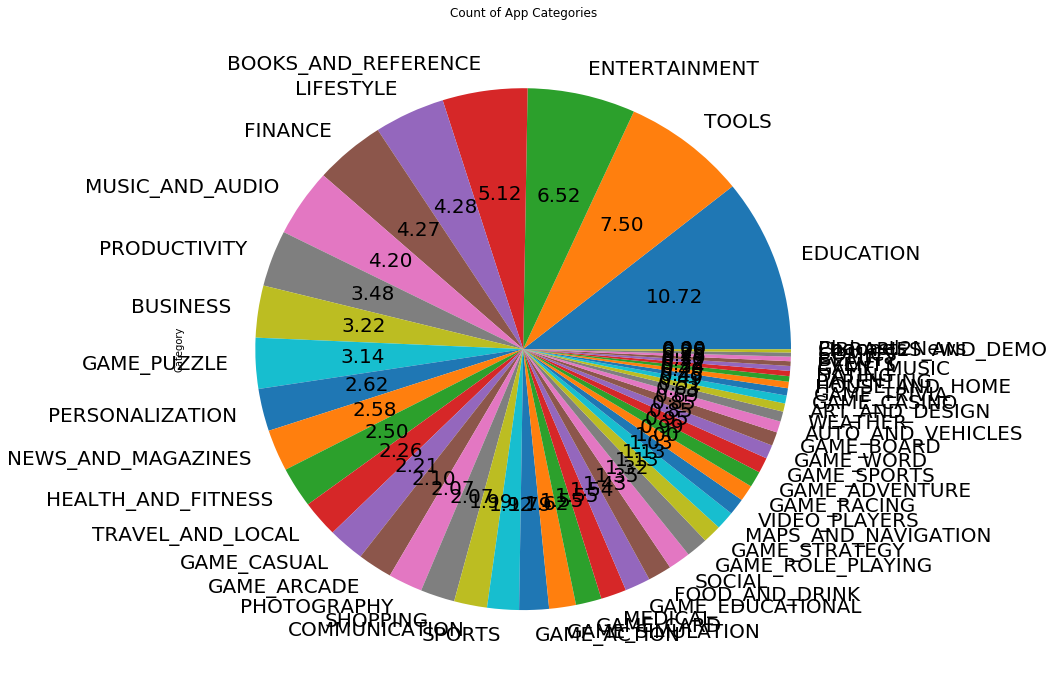

In [16]:
#Plotting pie chart to show which category of apps is most widely used.
APPSDF['Category'].value_counts().plot(kind='pie',title='Count of App Categories', autopct='%.2f', fontsize=20, figsize=(12,12))                         

## SIZE

Lets look into frequency of each item to get an idea of data nature.

In [17]:
APPSDF.Size.value_counts()

Varies with device    3195
11M                    859
12M                    711
13M                    616
14M                    598
15M                    594
16M                    583
18M                    465
10M                    464
17M                    451
19M                    432
20M                    416
21M                    405
22M                    400
25M                    395
24M                    393
23M                    388
26M                    379
27M                    343
28M                    302
30M                    287
29M                    251
32M                    246
31M                    246
36M                    240
37M                    221
34M                    217
33M                    211
35M                    209
3.4M                   207
                      ... 
938k                     1
76k                      1
525k                     1
531k                     1
167k                     1
845k                     1
3

Since size column should be numeric, we should change 'Varies with device' to nan values which can be dealt with later.

In [18]:
APPSDF.Size = APPSDF.Size.replace('Varies with device' ,np.nan)

It can be seen that data has metric prefixes (Kilo and Mega) along with another string. Replacing k and M with their values to convert values to numeric. We also notice '+' after 100 and 1000 which need to be stripped.

In [19]:
APPSDF.Size= APPSDF.Size.str.replace('k', 'e+3')
APPSDF.Size= APPSDF.Size.str.replace('M','e+6')
APPSDF.Size= APPSDF.Size.replace('1000+','1000')
APPSDF.Size= APPSDF.Size.replace('100+','100')

Let's see if they have been converted.

In [20]:
APPSDF.Size.value_counts()

11e+6       859
12e+6       711
13e+6       616
14e+6       598
15e+6       594
16e+6       583
18e+6       465
10e+6       464
17e+6       451
19e+6       432
20e+6       416
21e+6       405
22e+6       400
25e+6       395
24e+6       393
23e+6       388
26e+6       379
27e+6       343
28e+6       302
30e+6       287
29e+6       251
32e+6       246
31e+6       246
36e+6       240
37e+6       221
34e+6       217
33e+6       211
35e+6       209
3.4e+6      207
38e+6       205
           ... 
334e+6        1
581e+3        1
166e+3        1
634e+3        1
473e+3        1
630e+3        1
658e+3        1
763e+3        1
639e+3        1
563e+3        1
1,011e+3      1
228e+3        1
446e+3        1
210e+3        1
182e+3        1
655e+3        1
566e+3        1
438e+3        1
255e+3        1
216e+3        1
649e+3        1
138e+3        1
302e+3        1
550e+3        1
954e+3        1
245e+3        1
226e+3        1
1,006e+3      1
371e+3        1
672e+3        1
Name: Size, Length: 577,

In [21]:
APPSDF['Size'].isnull().sum()

3195

Since we now have 3195 null values, we need to fill them in order to get rid of null values in the column.

In [22]:
APPSDF["Size"].fillna("nan", inplace = True)

In [23]:
#Let's see if they have all been filled
APPSDF.isnull().sum()

App Name           0
Category           0
Rating             0
Reviews            0
Installs           0
Size               0
Price              0
Content Rating     0
Last Updated       0
Minimum Version    0
Latest Version     0
dtype: int64

In [24]:
APPSDF['Size'].value_counts()

nan         3195
11e+6        859
12e+6        711
13e+6        616
14e+6        598
15e+6        594
16e+6        583
18e+6        465
10e+6        464
17e+6        451
19e+6        432
20e+6        416
21e+6        405
22e+6        400
25e+6        395
24e+6        393
23e+6        388
26e+6        379
27e+6        343
28e+6        302
30e+6        287
29e+6        251
31e+6        246
32e+6        246
36e+6        240
37e+6        221
34e+6        217
33e+6        211
35e+6        209
3.4e+6       207
            ... 
581e+3         1
166e+3         1
634e+3         1
473e+3         1
630e+3         1
763e+3         1
969e+3         1
216e+3         1
97e+3          1
563e+3         1
1,011e+3       1
228e+3         1
446e+3         1
210e+3         1
182e+3         1
655e+3         1
566e+3         1
438e+3         1
639e+3         1
255e+3         1
649e+3         1
138e+3         1
302e+3         1
550e+3         1
954e+3         1
245e+3         1
226e+3         1
1,006e+3      

Now, we have some two types of values in our Size data.

exponential values (not yet converted to string)
Strings (that cannot be converted into numeric)
Thus specifing categories 1 and 2 as an boolean array temp, to convert category 1 to numeric.

In [25]:
def is_convertable(v):
    try:
        float(v)
        return True
    except ValueError:
        return False
    
temp=APPSDF['Size'].apply(lambda x: is_convertable(x))
temp.head()

0    True
1    True
2    True
3    True
4    True
Name: Size, dtype: bool

Converting the cleaned Size data to numeric type

In [26]:
APPSDF["Size"]= pd.to_numeric(APPSDF["Size"], errors='coerce')

In [27]:
#Let's see if the size column data type has changed.
APPSDF.dtypes

App Name            object
Category            object
Rating              object
Reviews             object
Installs            object
Size               float64
Price               object
Content Rating      object
Last Updated        object
Minimum Version     object
Latest Version      object
dtype: object

Observe the distribution of Size in the dataset using the bar graph below.

Text(0,0.5,'Frequency')

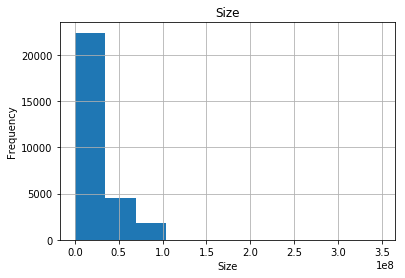

In [28]:
APPSDF.hist(column='Size')
plt.xlabel('Size')
plt.ylabel('Frequency')

## INSTALLS

Checking unique values in Install data.

In [29]:
APPSDF.Installs.value_counts()

100,000+          6745
1,000,000+        5194
10,000+           4590
500,000+          2863
50,000+           2642
1,000+            2342
10,000,000+       1941
5,000,000+        1528
5,000+            1476
100+               960
500+               709
50,000,000+        328
100,000,000+       256
10+                158
50+                153
500,000,000+        33
5+                  28
1,000,000,000+      24
1+                  22
5,000,000,000+       3
0+                   2
11976                1
EDUCATION            1
Name: Installs, dtype: int64

It can be seen that there are various unique values, out of which:

1 is 0,
1 is EDUCATION(string) , which we will be converting to nan here
and rest are numeric but with '+' and ',' which shall be removed to convert these into numeric type.

In [30]:
APPSDF.Installs= APPSDF.Installs.apply(lambda x: x.strip('+'))
APPSDF.Installs= APPSDF.Installs.apply(lambda x: x.replace(',',''))
APPSDF.Installs.value_counts()

100000        6745
1000000       5194
10000         4590
500000        2863
50000         2642
1000          2342
10000000      1941
5000000       1528
5000          1476
100            960
500            709
50000000       328
100000000      256
10             158
50             153
500000000       33
5               28
1000000000      24
1               22
5000000000       3
0                2
11976            1
EDUCATION        1
Name: Installs, dtype: int64

In [31]:
#replacing the String Education with nan value
APPSDF.Installs= APPSDF.Installs.apply(lambda x:x.replace('EDUCATION','NaN'))

In [32]:
APPSDF.Installs.value_counts()

100000        6745
1000000       5194
10000         4590
500000        2863
50000         2642
1000          2342
10000000      1941
5000000       1528
5000          1476
100            960
500            709
50000000       328
100000000      256
10             158
50             153
500000000       33
5               28
1000000000      24
1               22
5000000000       3
0                2
11976            1
NaN              1
Name: Installs, dtype: int64

In [33]:
#Dropping the NAN value
APPSDF.drop(APPSDF[APPSDF['Installs'] =='NaN'].index, inplace=True)

In [34]:
#Let's see if the output is correct.
APPSDF['Installs'].value_counts()

100000        6745
1000000       5194
10000         4590
500000        2863
50000         2642
1000          2342
10000000      1941
5000000       1528
5000          1476
100            960
500            709
50000000       328
100000000      256
10             158
50             153
500000000       33
5               28
1000000000      24
1               22
5000000000       3
0                2
11976            1
Name: Installs, dtype: int64

Let's screen for missing values

In [35]:
APPSDF['Installs'].isna().sum()

0

Converting Installs from object to numeric

In [36]:
APPSDF['Installs']= pd.to_numeric(APPSDF['Installs'], errors = 'coerce')

In [37]:
#startbinvalue = 0
#endbinvalue = 5000000000
#binsize= 1000000
#bins = np.arange(startbinvalue, endbinvalue, binsize)
#APPSDF['Installs'] = np.digitize(APPSDF['Installs'], bins)
#Installsbinned_numpyArray = np.array(Installsbinned)
#print Installsbinned

In [38]:
#APPSDF['Binned_Installs'] =pd.cut(APPSDF['Installs'], bins =['0','500000','1500000','2000000','2500000','3000000','3500000','4000000','4500000','5000000','>5000000'], labels=['Poor','slightly above poor','significantly above poor','Average','slightly above average','significantly above average','Good','Room for better','Best','Great'])
#APPSDF['Binned_Installs'].head()

Text(0,0.5,'Frequency')

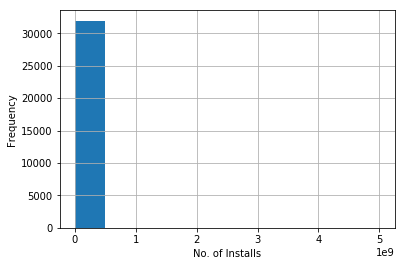

In [39]:
APPSDF.Installs=pd.to_numeric(APPSDF.Installs)
APPSDF.Installs.hist();
plt.xlabel('No. of Installs')
plt.ylabel('Frequency')

## REVIEWS

Since we expect Reviews data to be numeric,lets's check if all values in number of Reviews numeric

In [40]:
APPSDF['Reviews'].str.isnumeric().sum()

0.0

None is numeric

In [41]:
APPSDF['Reviews'].unique()

array([305034.0, 1207922.0, 1967.0, ..., 11214.0, 14039.0, 1796.0],
      dtype=object)

Converting column into numeric 

In [42]:
APPSDF["Reviews"]= pd.to_numeric(APPSDF["Reviews"], errors='coerce')

In [43]:
#Views the dtype now after conversion
APPSDF['Reviews'].dtype

dtype('float64')

Text(0,0.5,'Frequency')

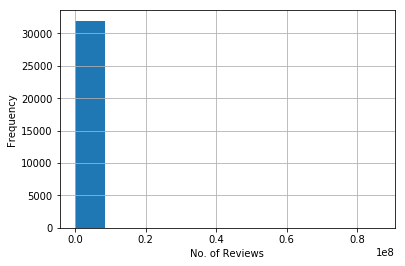

In [44]:
APPSDF['Reviews'].hist();
plt.xlabel('No. of Reviews')
plt.ylabel('Frequency')

## RATING

For entries to be right we need to make sure they fall within the range 1 to 5.

In [45]:
print ("Range: ", APPSDF.Rating.min(), APPSDF.Rating.max() )

('Range: ', '1', 'NEWS_AND_MAGAZINES')


We've noticed there are string values in the column that shouldn't be there.Let's see just how many they are.

In [46]:
print(APPSDF['Rating'] == ' Lessons').sum()

0


In [47]:
print(APPSDF['Rating'] == 'GAME_STRATEGY').sum()

0


In [48]:
print(APPSDF['Rating'] == 'NEWS_AND_MAGAZINES').sum()

1


We need to convert the strings into null values that can be dropped for better analysis.

In [49]:
APPSDF['Rating'] = APPSDF['Rating'].str.replace('NEWS_AND_MAGAZINES', 'nan')
APPSDF['Rating'] = APPSDF['Rating'].str.replace('GAME_STRATEGY', 'nan')
APPSDF['Rating'] = APPSDF['Rating'].str.replace('Lessons', 'nan')

In [50]:
APPSDF.drop(APPSDF[APPSDF['Rating'] =='nan'].index, inplace=True)

Checking the type of data, to see if it needs to be converted to numeric

In [51]:
APPSDF['Rating'].dtype

dtype('O')

converting to numeric

In [52]:
APPSDF['Rating']=pd.to_numeric(APPSDF['Rating'], errors= 'coerce')

Let's view our values to ensure they fall between 1.0 and 5.0

In [53]:
APPSDF['Rating'].value_counts()

5.000000    1014
4.000000     259
4.500000     158
3.000000     130
4.333333     117
4.666667     108
3.666667      89
4.200000      85
4.750000      76
4.250000      70
3.500000      65
4.600000      59
1.000000      58
4.400000      50
4.428571      47
4.166667      45
4.714286      41
4.375000      39
4.833333      39
4.800000      38
3.750000      35
4.555555      35
4.625000      32
4.285714      31
4.142857      30
4.857143      29
3.800000      29
4.571429      28
4.444445      28
2.333333      28
            ... 
4.625454       1
3.921323       1
3.836425       1
4.691830       1
4.423214       1
4.534301       1
4.374204       1
4.591774       1
4.646525       1
4.685112       1
4.323545       1
4.100803       1
4.564723       1
3.941120       1
4.159134       1
4.441252       1
4.366273       1
4.499503       1
4.439115       1
4.491236       1
4.711847       1
4.242339       1
4.438008       1
3.325920       1
3.963856       1
4.438830       1
3.745520       1
4.645349      

The graph below shows the rating distribution of the apps

Text(0,0.5,'Frequency')

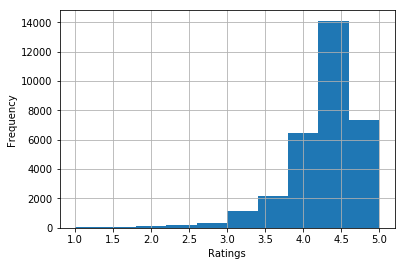

In [54]:
APPSDF['Rating'].hist();
plt.xlabel('Ratings')
plt.ylabel('Frequency')

## PRICE

Checking for unique values of price, along with any abnormalities

In [55]:
APPSDF["Price"].unique()

array(['0', '$5.99', '$2.99', '$1.99', '$6.99', '$4.99', '$3.99', '$9.99',
       '$0.99', '$3.49', '$13.99', '$7.99', '$4.95', '$5.49', '$39.99',
       '$8.99', '$1.49', '$7.49', '$399.99', '$2.49', '$10.99', '$2.20',
       '$1.25', '$11.99', '$14.99', '$74.99', '$99.99', '$9.00', '$24.99',
       '$10.00', '$4.89', '$4.49', '$15.99', '$3.22', '$3.55', '$12.99',
       '$23.99', '$3.75', '$6.49', '$19.99', '$3.95', '$32.99', '$1.26',
       '$21.00', '$9.79', '$79.99', '$6.29', '$1.19', '$3.85', '$1.29',
       '$29.99', '$1.00', '$3.29', '$54.99', '$1.40', '$4.00', '$5.00',
       '$2.00', '$1.05', '$299.99', '$2.50', '$5.33', '$1.90', '$3.00',
       '$2.40', '$6.71', '$4.69', '$1.20', '$2.90', '$14.93', '$2.59',
       '$1.97', '$9.49', '$1.59', '$9.95', '$14.01', '$22.99', '$2.79',
       '$1.09', '$31.99', '$6.85', '$1.50', '$34.99', '$1.80', '$10.75',
       '$45.99', '$7.74', '$18.60', '$6.30', '$17.99', '$5.76', '$5.74',
       '$14.73', '$27.99', '$8.80', '$4.50', '$6.00', 

Checking for missing values as well

In [56]:
APPSDF["Price"].isnull().sum()

0

Data had $ and M sign which shall be removed to convert it to numeric. There is also 'Varies with device' which we should change to nan values. 

In [57]:
APPSDF['Price'] = APPSDF['Price'].str.replace('M', '000000')
APPSDF['Price'] = APPSDF['Price'].str.replace('Varies with device', 'nan')
APPSDF['Price'] = APPSDF['Price'].str.replace('$', '')

Let's see what the output looks like now

In [58]:
APPSDF['Price'].unique()

array(['0', '5.99', '2.99', '1.99', '6.99', '4.99', '3.99', '9.99',
       '0.99', '3.49', '13.99', '7.99', '4.95', '5.49', '39.99', '8.99',
       '1.49', '7.49', '399.99', '2.49', '10.99', '2.20', '1.25', '11.99',
       '14.99', '74.99', '99.99', '9.00', '24.99', '10.00', '4.89',
       '4.49', '15.99', '3.22', '3.55', '12.99', '23.99', '3.75', '6.49',
       '19.99', '3.95', '32.99', '1.26', '21.00', '9.79', '79.99', '6.29',
       '1.19', '3.85', '1.29', '29.99', '1.00', '3.29', '54.99', '1.40',
       '4.00', '5.00', '2.00', '1.05', '299.99', '2.50', '5.33', '1.90',
       '3.00', '2.40', '6.71', '4.69', '1.20', '2.90', '14.93', '2.59',
       '1.97', '9.49', '1.59', '9.95', '14.01', '22.99', '2.79', '1.09',
       '31.99', '6.85', '1.50', '34.99', '1.80', '10.75', '45.99', '7.74',
       '18.60', '6.30', '17.99', '5.76', '5.74', '14.73', '27.99', '8.80',
       '4.50', '6.00', '5.78', '12.00', '84.99', '8.49', '3.81'],
      dtype=object)

Dropping the nan values.

In [59]:
APPSDF.drop(APPSDF[APPSDF['Price'] == 'nan'].index, inplace= True)

Converting to numeric dtype

In [60]:
APPSDF['Price'] = pd.to_numeric(APPSDF['Price'])

Price distribution of the apps

Text(0,0.5,'Frequency')

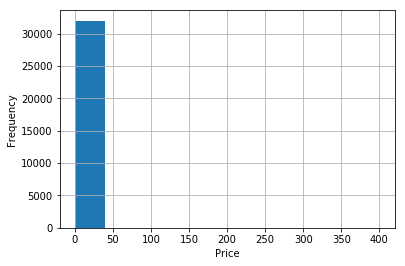

In [61]:
APPSDF.Price.hist();
plt.xlabel('Price')
plt.ylabel('Frequency')

## CONTENT RATING

Checking unique terms in Content Rating Categories, and for repetitive or abnormal data.

In [62]:
APPSDF['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

We observe that 0, $0.99 and 100,000+ should not be in the content rating column hence we need to drop them.

In [63]:
APPSDF.drop(APPSDF[APPSDF['Content Rating'] =={'100,000+','$0.99','0'}].index, inplace=True)

Checking to see they have been dropped

In [64]:
APPSDF['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

Checking for null values.

In [65]:
APPSDF['Content Rating'].isnull().sum()

0

Content Rating Distribution

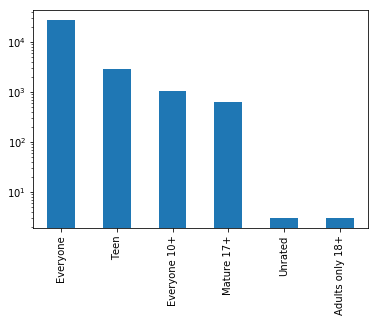

In [66]:
APPSDF['Content Rating'].value_counts().plot(kind='bar')
plt.yscale('log')

## LAST UPDATED

Checking the format of data in Last Updated Dates

In [67]:
APPSDF['Last Updated'].value_counts()

April 2, 2019        1090
April 1, 2019         859
March 28, 2019        673
March 29, 2019        632
March 27, 2019        563
April 3, 2019         541
March 26, 2019        526
March 25, 2019        455
March 14, 2019        394
March 21, 2019        381
March 20, 2019        375
March 22, 2019        374
March 12, 2019        350
March 15, 2019        325
March 19, 2019        325
March 18, 2019        318
March 11, 2019        306
March 13, 2019        303
March 7, 2019         288
March 6, 2019         286
March 8, 2019         268
March 30, 2019        261
March 31, 2019        252
February 27, 2019     238
March 5, 2019         229
February 28, 2019     226
February 25, 2019     218
March 4, 2019         216
March 1, 2019         213
February 26, 2019     202
                     ... 
January 1, 2015         1
August 14, 2014         1
March 30, 2013          1
July 31, 2014           1
June 1, 2013            1
June 8, 2016            1
July 26, 2012           1
March 1, 201

Converting the data i.e. string to datetime format for furthur processing

In [68]:
from datetime import datetime, date
APPSDF['Last Updated'] = pd.to_datetime(APPSDF['Last Updated'])

In [69]:
#Checking to see if output is as expected.
APPSDF['Last Updated'].head()

0   2019-03-29
1   2019-03-29
2   2018-09-20
3   2019-03-22
4   2019-04-01
Name: Last Updated, dtype: datetime64[ns]

In [70]:
APPSDF['Last Updated'].dtype

dtype('<M8[ns]')

Taking a difference between last updated date and today to simplify the data for future processing. It gives days

In [71]:
APPSDF['Last_Updated_Days'] = APPSDF['Last Updated'].apply(lambda x:date.today()-datetime.date(x))
APPSDF.Last_Updated_Days.head()

0   251 days
1   251 days
2   441 days
3   258 days
4   248 days
Name: Last_Updated_Days, dtype: timedelta64[ns]

## LATEST VERSION

Checking unique values, repetition, or any abnormalities.

In [72]:
APPSDF['Latest Version'].unique()

array(['Varies with device', '2.2.0', '4.18.2', ..., ':1.38.3+1',
       '1.0.2274', '1.1.2043'], dtype=object)

In [73]:
APPSDF['Latest Version'].value_counts()

Varies with device     2466
1                      1759
1.1                     717
1.2                     597
2                       468
1.3                     453
1.4                     397
1.5                     305
1.0.1                   291
3                       276
1.0.0                   272
2.1                     267
1.6                     255
1.0.2                   240
1.7                     217
1.0.3                   216
2.2                     183
4                       175
1.0.5                   171
1.8                     169
1.1.1                   159
1.0.4                   159
1.1.0                   159
2.3                     145
5                       138
1.3.0                   134
1.0.8                   133
1.0.6                   132
1.2.0                   129
1.0.7                   125
                       ... 
4.5.4.1                   1
3.4.21                    1
l7.0                      1
v4.6.2f                   1
2.9.2.0321          

check if the data has null values. 

In [74]:
APPSDF['Latest Version'].isna().sum()

0

To rectify all the values that have abnormalities eg 1.0_2019033159 to correct formats.

In [75]:
import re
APPSDF['Latest Version']=APPSDF['Latest Version'].apply(lambda x: 'Varies with device' if x=='Varies with device'  else  re.findall('^[0-9]\.[0-9]|[\d]|\W*',str(x))[0] )

In [76]:
#Check to see if they have been rectified to correct format
APPSDF['Latest Version'].unique()

array(['Varies with device', '2.2', '4.1', '7.6', '2.4', '6.6', '6.7',
       '2', '6.1', '7.3', '5.1', '2.1', '', '2.6', '1', '2.5', '5.2',
       '3.2', '4.0', '1.2', '3.4', '1.1', '5.8', '1.0', '1.3', '1.5',
       '0.7', '0.2', '1.4', '1.6', '2.0', '0.5', '0.4', '0.0', '8', '3.1',
       '4.2', '3.3', '1.9', '5.6', '9.1', '4.9', '2.7', '7.2', '8.1',
       '3.7', '5.4', '7.4', '6.2', '5.3', '3.8', '6.3', '2.9', '7.9',
       '1.8', '4.5', '6.5', '5.7', '1.7', '2.8', '3.6', '3.5', '8.0',
       '4.3', '6.9', '3', '4.4', '5.5', '4', '5', '2.3', '8.6', '3.0',
       '6.4', '7.5', '6.0', '4.6', '3.9', '8.3', '4.7', '5.0', '7.8',
       '7.1', '9.2', '0.1', '4.8', '6', '8.9', '9.4', '7.0', '9.0', '0',
       '5.9', '8.2', '7.7', '8.8', '8.4', '6.8', '8.7', '9', '0.3', '7',
       '9.5', '9.3', '0.9', '9.6', '9.9', '9.8', '9.7', '0.8', ':', '8.5',
       '0.6', '?.?', ' '], dtype=object)

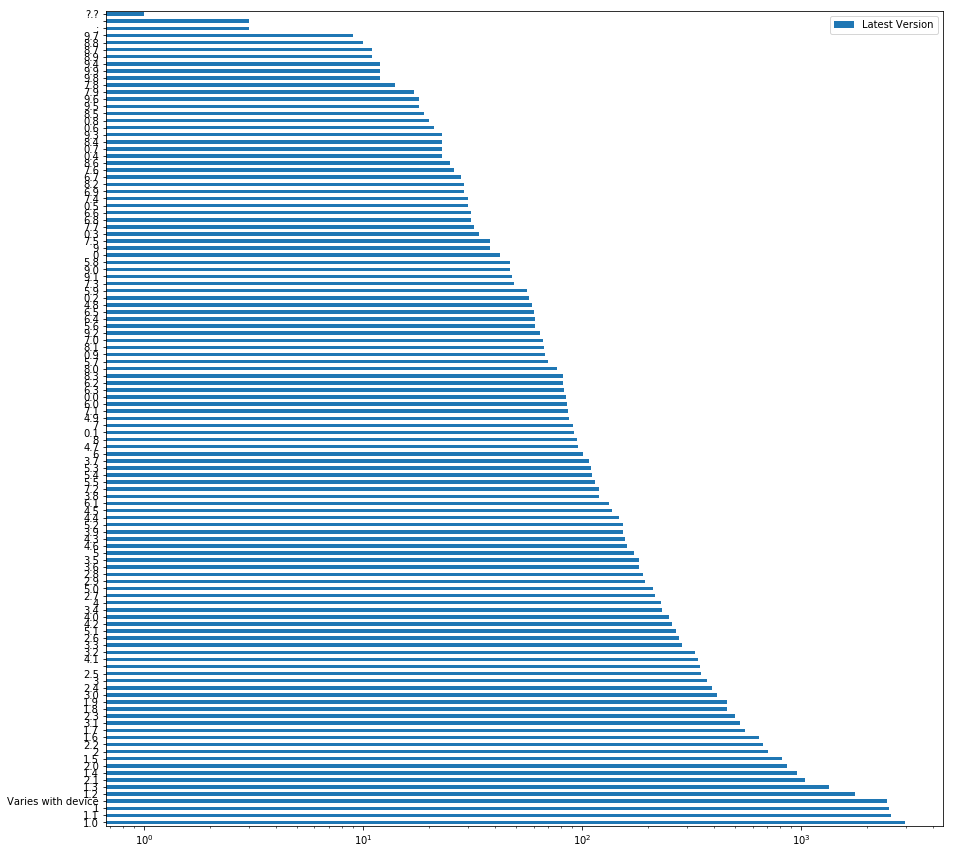

In [77]:
APPSDF['Latest Version'].value_counts().plot(kind="barh", figsize=(15,15));
plt.legend(bbox_to_anchor=(1.0,1.0))
plt.xscale('log')

## MINIMUM VERSION

Checking unique values, repetition, or any abnormalities.

In [78]:
APPSDF['Minimum Version'].value_counts()

4.1 and up            8465
4.0.3 and up          5213
4.0 and up            3792
4.4 and up            3668
5.0 and up            2650
Varies with device    2324
4.2 and up            1477
2.3 and up            1315
4.3 and up             700
2.2 and up             444
2.3.3 and up           423
3.0 and up             381
6.0 and up             361
2.1 and up             197
5.1 and up             131
1.6 and up             101
7.0 and up              83
1.5 and up              69
4.4W and up             42
2.0 and up              33
3.2 and up              31
3.1 and up              30
8.0 and up              24
2.0.1 and up            22
7.1 and up               9
1.0 and up               3
1.1 and up               2
4.2 - 8.0                1
2.3 - 3.2                1
4.1 - 8.0                1
2.2 - 6.0                1
4.1 - 7.1.1              1
4.0 - 5.1                1
5.0 - 8.0                1
Name: Minimum Version, dtype: int64

In [79]:
APPSDF['Minimum Version'].unique()

array(['Varies with device', '5.0 and up', '4.2 and up', '4.3 and up',
       '4.1 and up', '4.0 and up', '4.0.3 and up', '4.4 and up',
       '5.1 and up', '6.0 and up', '2.3 and up', '7.0 and up',
       '2.1 and up', '2.2 and up', '2.3.3 and up', '1.6 and up',
       '3.1 and up', '2.0 and up', '3.0 and up', '1.5 and up',
       '2.0.1 and up', '8.0 and up', '7.1 and up', '1.1 and up',
       '3.2 and up', '4.4W and up', '4.1 - 7.1.1', '4.0 - 5.1',
       '4.1 - 8.0', '1.0 and up', '5.0 - 8.0', '2.2 - 6.0', '2.3 - 3.2',
       '4.2 - 8.0'], dtype=object)

Most of the values have a upper value and a lower value (i.e. a range), lets divide them as two new features Version begin and end, which might come handy while processing data further.

In [80]:
APPSDF['Version_begin']=APPSDF['Minimum Version'].apply(lambda x:str(x).split(' and ')[0].split(' - ')[0])
APPSDF.Version_begin=APPSDF.Version_begin.replace('4.4W','4.4')
APPSDF['Version_end']=APPSDF['Minimum Version'].apply(lambda x:str(x).split(' and ')[-1].split(' - ')[-1])

In [81]:
#Let's see if the column created Version_begin has the correct data.
APPSDF['Version_begin'].unique()

array(['Varies with device', '5.0', '4.2', '4.3', '4.1', '4.0', '4.0.3',
       '4.4', '5.1', '6.0', '2.3', '7.0', '2.1', '2.2', '2.3.3', '1.6',
       '3.1', '2.0', '3.0', '1.5', '2.0.1', '8.0', '7.1', '1.1', '3.2',
       '1.0'], dtype=object)

Representing categorial data as two way table and plotting it as stacked columns for better understanding.

In [82]:
twowaytable = pd.crosstab(index=APPSDF.Version_begin,columns=APPSDF.Version_end)
twowaytable.head()

Version_end,3.2,5.1,6.0,7.1.1,8.0,Varies with device,up
Version_begin,,,,,,,
1.0,0,0,0,0,0,0,3
1.1,0,0,0,0,0,0,2
1.5,0,0,0,0,0,0,69
1.6,0,0,0,0,0,0,101
2.0,0,0,0,0,0,0,33


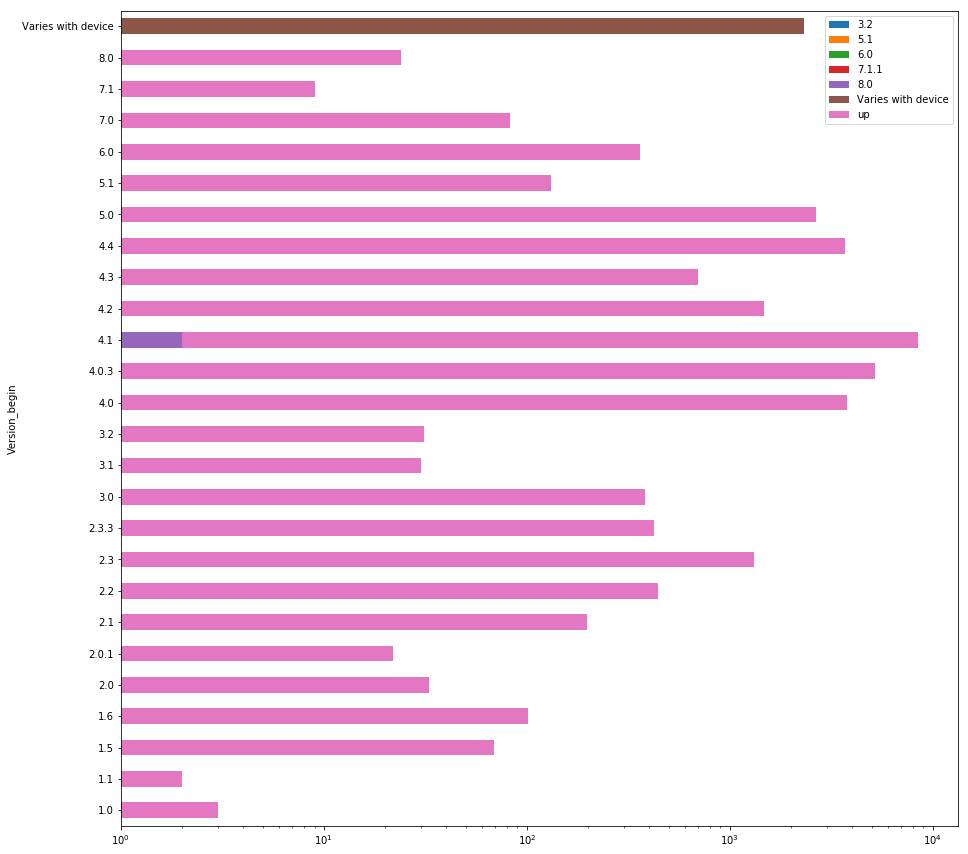

In [83]:
twowaytable.plot(kind="barh", figsize=(15,15),stacked=True);
plt.legend(bbox_to_anchor=(1.0,1.0))
plt.xscale('log')

Now le't check to see that our columns are in the correct data types to work with.

In [84]:
APPSDF.dtypes

App Name                      object
Category                      object
Rating                       float64
Reviews                      float64
Installs                       int64
Size                         float64
Price                        float64
Content Rating                object
Last Updated          datetime64[ns]
Minimum Version               object
Latest Version                object
Last_Updated_Days    timedelta64[ns]
Version_begin                 object
Version_end                   object
dtype: object

## Step 3: Exploratory Analysis

Now we investigate the relationships between these variables to determine which features are relevant/ correlated to the number of installs a mobile app may have.

In [85]:
APPSDF.corr(method='pearson')

,Rating,Reviews,Installs,Size,Price
Rating,1.000000,0.025261,0.009990,0.018766,0.012309
Reviews,0.025261,1.000000,0.473307,0.113550,-0.006741
Installs,0.009990,0.473307,1.000000,0.084697,-0.006051
Size,0.018766,0.113550,0.084697,1.000000,0.010239
Price,0.012309,-0.006741,-0.006051,0.010239,1.000000


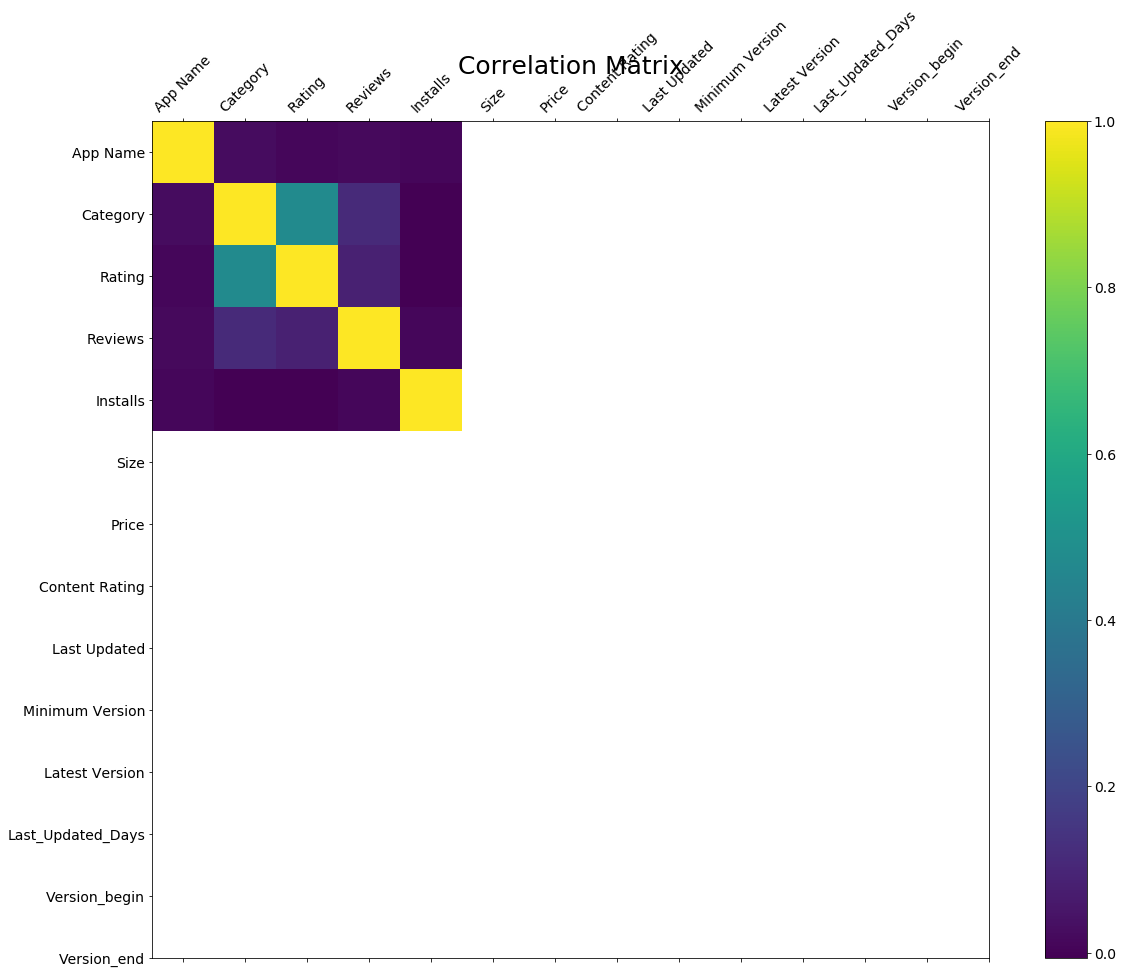

In [86]:
#Showing the Correlation of the variables in the dataframe using a correlation matrix
f = plt.figure(figsize=(20, 15))
plt.matshow(APPSDF.corr(), fignum=f.number)
plt.xticks(range(APPSDF.shape[1]), APPSDF.columns, fontsize=14, rotation=45)
plt.yticks(range(APPSDF.shape[1]), APPSDF.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=25);

In [89]:
APPSDF['Content Rating'].value_counts()

Everyone           27455
Teen                2860
Everyone 10+        1054
Mature 17+           622
Unrated                3
Adults only 18+        3
Name: Content Rating, dtype: int64

In [90]:
#Encoding the categorical data using Custom Mapping
contentrating_mapping = {'Everyone':1, 'Teen':2, 'Everyone 10+':3, 'Mature 17+':4, 'Unrated':5, 'Adults only 18+':6}

APPSDF['Content Rating'] =APPSDF['Content Rating'].map(contentrating_mapping)

APPSDF

,App Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating,Last Updated,Minimum Version,Latest Version,Last_Updated_Days,Version_begin,Version_end
0,DoorDash - Food Delivery,FOOD_AND_DRINK,4.548562,305034.0,5000000,NaN,0.00,1,2019-03-29,Varies with device,Varies with device,251 days,Varies with device,Varies with device
1,TripAdvisor Hotels Flights Restaurants Attract...,TRAVEL_AND_LOCAL,4.400671,1207922.0,100000000,NaN,0.00,1,2019-03-29,Varies with device,Varies with device,251 days,Varies with device,Varies with device
2,Peapod,SHOPPING,3.656329,1967.0,100000,1400000.0,0.00,1,2018-09-20,5.0 and up,2.2,441 days,5.0,up
3,foodpanda - Local Food Delivery,FOOD_AND_DRINK,4.107233,389154.0,10000000,16000000.0,0.00,1,2019-03-22,4.2 and up,4.1,258 days,4.2,up
4,My CookBook Pro (Ad Free),FOOD_AND_DRINK,4.647752,2291.0,10000,NaN,5.99,1,2019-04-01,Varies with device,Varies with device,248 days,Varies with device,Varies with device
5,Safeway Online Shopping,FOOD_AND_DRINK,3.825322,2559.0,100000,23000000.0,0.00,1,2019-03-29,5.0 and up,7.6,251 days,5.0,up
6,"Yelp: Food, Shopping, Services Nearby",TRAVEL_AND_LOCAL,4.267268,421918.0,10000000,NaN,0.00,2,2019-03-28,Varies with device,Varies with device,252 days,Varies with device,Varies with device
7,Talabat: Food Delivery,FOOD_AND_DRINK,4.495085,142618.0,5000000,NaN,0.00,1,2019-03-31,Varies with device,Varies with device,249 days,Varies with device,Varies with device
8,Fast Food Locator | Worldwide Fast Food Finder,TRAVEL_AND_LOCAL,3.811765,85.0,10000,4100000.0,0.00,1,2019-02-10,4.3 and up,2.4,298 days,4.3,up
9,Allrecipes Dinner Spinner,FOOD_AND_DRINK,4.545353,67514.0,5000000,NaN,0.00,1,2019-03-07,Varies with device,Varies with device,273 days,Varies with device,Varies with device


Exploring our categories column

## AGGREGATION

Since Category is a column with various(more than 30),we need to aggregate some features in order to make sense of the category.

In [91]:
#Which categories have amongst the latest version?
APPSDF.groupby([APPSDF['Category'],APPSDF['Version_end']]).describe()

Rating                                \
                                         count      mean       std       min   
Category            Version_end                                                
ART_AND_DESIGN      Varies with device     6.0  4.221283  0.223029  3.855376   
                    up                   157.0  4.283484  0.433361  2.270833   
AUTO_AND_VEHICLES   Varies with device    12.0  4.180712  0.550457  2.700000   
                    up                   210.0  4.233729  0.464610  1.857143   
BEAUTY              Varies with device     1.0  4.424515       NaN  4.424515   
                    up                    89.0  4.231489  0.687959  1.000000   
BOOKS_AND_REFERENCE Varies with device    96.0  4.392354  0.428362  1.454545   
                    up                  1543.0  4.481960  0.416731  1.000000   
BUSINESS            Varies with device    77.0  4.092307  0.481573  2.189414   
                    up                   953.0  4.057504  0.720022  1.000000   
COMICS              Varies with device     3.0  4.172705  0.348872  3.827724   
                    up                    78.0  4.261287  0.424480  3.009346   
COMMUNICATION       Varies with device    56.0  4.265013  0.263431  3.685714   
                    up                   581.0  4.222367  0.482780  1.000000   
DATING              Varies with device     6.0  4.039672  0.064006  3.973889   
                    up                    97.0  3.818712  0.806148  1.000000   
EDUCATION           Varies with device   124.0  4.394216  0.284037  3.000000   
                    up                  3307.0  4.376812  0.473359  1.000000   
ENTERTAINMENT       Varies with device   115.0  4.080524  0.450773  2.185219   
                    up                  1970.0  4.205315  0.537505  1.000000   
EVENTS              Varies with device     4.0  4.513176  0.236507  4.202737   
                    up                    89.0  3.981799  1.023999  1.000000   
FINANCE             Varies with device   125.0  4.136568  0.526160  1.594421   
                    up                  1242.0  4.006967  0.630741  1.000000   
FOOD_AND_DRINK      Varies with device    29.0  4.239651  0.515085  2.547170   
                    up                   430.0  4.206823  0.646812  1.000000   
GAME_ACTION         Varies with device    27.0  4.321962  0.241096  3.702979   
                    up                   546.0  4.300549  0.360672  1.000000   
GAME_ADVENTURE      Varies with device     6.0  4.414873  0.193658  4.129091   
                    up                   310.0  4.335804  0.349216  2.500000   
...                                        ...       ...       ...       ...   
MUSIC_AND_AUDIO     Varies with device    86.0  4.260170  0.482039  1.929012   
                    up                  1256.0  4.405776  0.444955  1.000000   
NEWS_AND_MAGAZINES  Varies with device   101.0  4.167766  0.363563  3.254620   
                    up                   724.0  4.169973  0.547603  1.000000   
PARENTING           Varies with device     5.0  4.595066  0.157519  4.327877   
                    up                   104.0  4.326251  0.543610  1.000000   
PERSONALIZATION     8.0                    1.0  4.358367       NaN  4.358367   
                    Varies with device    87.0  4.279090  0.230492  3.667979   
                    up                   751.0  4.441082  0.352982  2.279070   
PHOTOGRAPHY         8.0                    1.0  4.456051       NaN  4.456051   
                    Varies with device    76.0  4.270648  0.323400  2.826087   
                    up                   586.0  4.261462  0.488276  1.000000   
PRODUCTIVITY        5.1                    1.0  4.393665       NaN  4.393665   
                    Varies with device   132.0  4.289001  0.342833  3.208684   
                    up                   980.0  4.231275  0.508382  1.000000   
SHOPPING            Varies with device    85.0  4.250850  0.445839  1.956661   
                    up                  

Which categories of applications are made for everyone,just adults,specifically for teens or are they unrated?

In [96]:
APPSDF.groupby([APPSDF['Category'],APPSDF['Content Rating']]).describe()

Rating                                \
                                     count      mean       std       min   
Category            Content Rating                                         
ART_AND_DESIGN      1                152.0  4.272739  0.432494  2.270833   
                    2                  9.0  4.402443  0.371500  3.674157   
                    3                  1.0  4.208925       NaN  4.208925   
                    4                  1.0  4.547445       NaN  4.547445   
AUTO_AND_VEHICLES   1                202.0  4.239763  0.467832  1.857143   
                    2                 11.0  3.993767  0.576327  2.585366   
                    3                  5.0  4.400898  0.245752  4.103541   
                    4                  4.0  4.220905  0.220267  3.944138   
BEAUTY              1                 79.0  4.220788  0.728464  1.000000   
                    2                  9.0  4.327059  0.152451  4.048387   
                    3                  1.0  4.288725       NaN  4.288725   
                    4                  1.0  4.352580       NaN  4.352580   
BOOKS_AND_REFERENCE 1               1496.0  4.481408  0.425212  1.000000   
                    2                 77.0  4.417267  0.363335  3.000000   
                    3                 39.0  4.372160  0.302232  3.578947   
                    4                 27.0  4.537025  0.224557  4.046978   
BUSINESS            1               1004.0  4.051951  0.706707  1.000000   
                    2                 24.0  4.397978  0.555538  3.285714   
                    4                  2.0  4.099560  0.645876  3.642857   
COMICS              1                 31.0  4.311672  0.428279  3.390023   
                    2                 39.0  4.208338  0.424965  3.009346   
                    3                  7.0  4.259993  0.405720  3.873646   
                    4                  4.0  4.322878  0.441552  3.827724   
COMMUNICATION       1                542.0  4.195767  0.480955  1.000000   
                    2                 68.0  4.406357  0.355812  3.277311   
                    3                  2.0  4.478992  0.071305  4.428571   
                    4                 25.0  4.373579  0.294675  3.842105   
DATING              1                 12.0  3.702175  0.822920  2.111111   
                    2                  3.0  4.095371  0.764481  3.218750   
                    3                  1.0  3.800000       NaN  3.800000   
...                                    ...       ...       ...       ...   
PRODUCTIVITY        1               1091.0  4.236770  0.494518  1.000000   
                    2                 11.0  4.445380  0.325367  3.873418   
                    4                 11.0  4.179645  0.265685  3.755669   
SHOPPING            1                601.0  4.174845  0.531449  1.052632   
                    2                 60.0  4.295428  0.433269  2.238095   
                    4                  1.0  2.813205       NaN  2.813205   
SOCIAL              1                172.0  4.324237  0.446065  1.000000   
                    2                177.0  4.262764  0.513823  1.000000   
                    3                  1.0  4.315596       NaN  4.315596   
                    4                 81.0  4.237643  0.335968  3.153846   
SPORTS              1                557.0  4.230222  0.540980  1.000000   
                    2                 32.0  4.165356  0.571944  2.272966   
                    3                 14.0  4.178638  0.419740  3.140479   
                    4                  7.0  4.321001  0.488546  3.596710   
                    5                  1.0  4.142857       NaN  4.142857   
                    6                  2.0  4.574178  0.016598  4.562441   
TOOLS               1               2356.0  4.259722  0.479034  1.000000   
                    2                 30.0  4.196453  0.714747  1.000000   
                    4                 13.0  4.137803  0.652071  2.725117   
TRAVEL_A

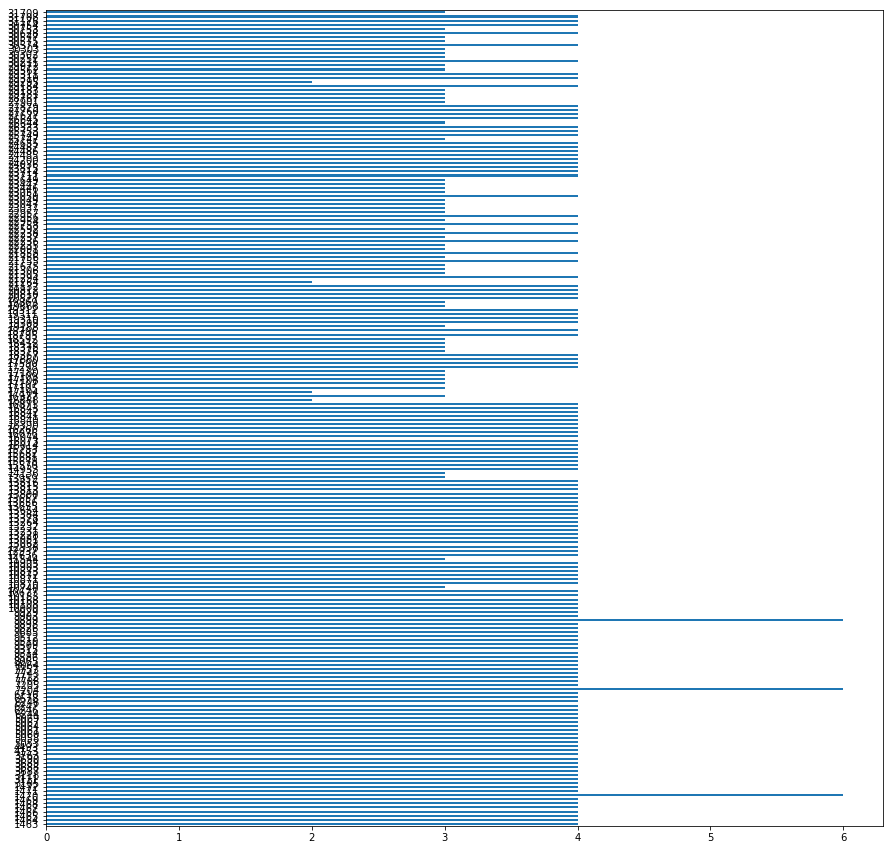

In [100]:
APPSDF.groupby('Category')['Content Rating'].plot(kind="barh",figsize=(15,15))
plt.show()

In [101]:
#Converting Last updated days to int for plotting
APPSDF['Last_Updated_Days']=APPSDF['Last_Updated_Days'].dt.days

In [102]:
APPSDF['Last_Updated_Days'].value_counts()

247     1090
248      859
252      673
251      632
253      563
246      541
254      526
255      455
266      394
259      381
260      375
258      374
268      350
265      325
261      325
262      318
269      306
267      303
273      288
274      286
272      268
250      261
249      252
281      238
275      229
280      226
283      218
276      216
279      213
282      202
        ... 
1322       1
3339       1
1194       1
2530       1
2546       1
3131       1
1082       1
2594       1
858        1
2891       1
2859       1
2690       1
2667       1
2491       1
2443       1
2754       1
2331       1
2075       1
1961       1
1929       1
1897       1
915        1
1849       1
1769       1
1753       1
1737       1
1705       1
1641       1
1593       1
2047       1
Name: Last_Updated_Days, Length: 1813, dtype: int64

Which category of mobile applications is frequently updated?

In [103]:
APPSDF['Last_Updated_Days'].groupby([APPSDF['Category']]).mean()

Category
ART_AND_DESIGN         389.834356
AUTO_AND_VEHICLES      323.657658
BEAUTY                 358.800000
BOOKS_AND_REFERENCE    494.688225
BUSINESS               397.451456
COMICS                 325.666667
COMMUNICATION          403.384615
DATING                 311.679612
EDUCATION              454.985427
ENTERTAINMENT          433.021583
EVENTS                 392.634409
FINANCE                354.485735
FOOD_AND_DRINK         346.464052
GAME_ACTION            557.928447
GAME_ADVENTURE         606.316456
GAME_ARCADE            679.619970
GAME_BOARD             500.118081
GAME_CARD              427.810865
GAME_CASINO            403.151899
GAME_CASUAL            570.341808
GAME_EDUCATIONAL       550.127789
GAME_MUSIC             531.226804
GAME_PUZZLE            544.539761
GAME_RACING            648.978056
GAME_ROLE_PLAYING      465.900238
GAME_SIMULATION        489.491296
GAME_SPORTS            562.695082
GAME_STRATEGY          510.102210
GAME_TRIVIA            473.082759
GAME_

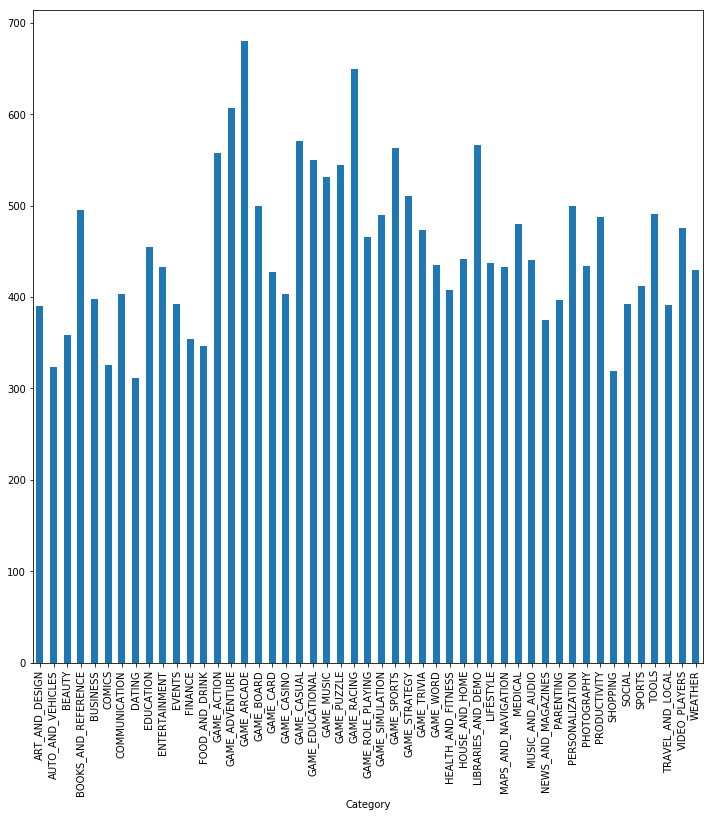

In [104]:
APPSDF['Last_Updated_Days'].groupby([APPSDF['Category']]).mean().plot(kind="bar",figsize=(12,12))

In [ ]:
from matplotlib.ticker import MaxNLocator
from collections import namedtuple

In [109]:
APPSDF['Rating'].groupby(APPSDF['Category']).describe()

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
ART_AND_DESIGN,163.0,4.281194,0.427223,2.270833,4.113695,4.333333,4.545426,5.000000
AUTO_AND_VEHICLES,222.0,4.230863,0.468367,1.857143,4.028467,4.248691,4.530009,5.000000
BEAUTY,90.0,4.233634,0.684386,1.000000,4.187195,4.355098,4.528270,5.000000
BOOKS_AND_REFERENCE,1639.0,4.476711,0.417818,1.000000,4.358857,4.571271,4.713404,5.000000
BUSINESS,1030.0,4.060106,0.704876,1.000000,3.756203,4.202384,4.514271,5.000000
COMICS,81.0,4.258006,0.420420,3.009346,4.036842,4.191542,4.500000,5.000000
COMMUNICATION,637.0,4.226116,0.467656,1.000000,4.031250,4.292144,4.505379,5.000000
DATING,103.0,3.831584,0.783934,1.000000,3.381840,4.078384,4.333333,5.000000
EDUCATION,3431.0,4.377441,0.467837,1.000000,4.221101,4.469534,4.652120,5.000000


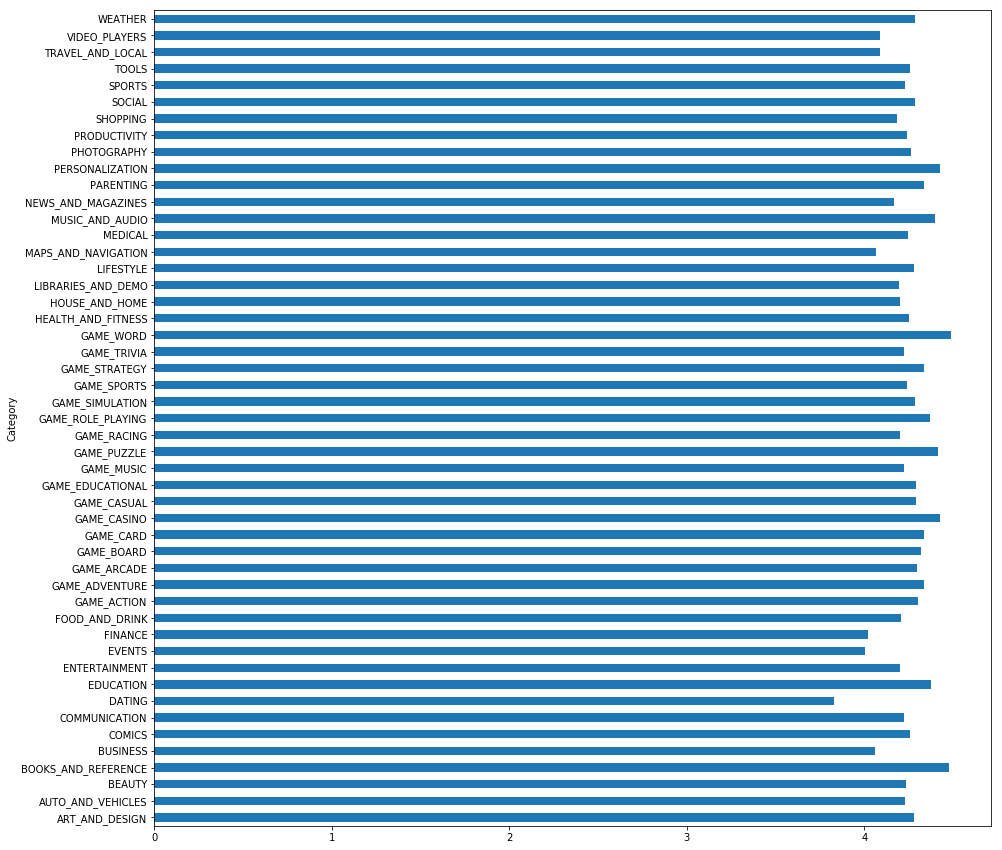

In [110]:
APPSDF['Rating'].groupby(APPSDF['Category']).mean().plot(kind="barh", figsize=(15,15))

In [111]:
APPSDF['Price'].groupby(APPSDF['Category']).describe()

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
ART_AND_DESIGN,163.0,0.042699,0.299827,0.0,0.0,0.0,0.00,2.99
AUTO_AND_VEHICLES,222.0,0.130315,0.851272,0.0,0.0,0.0,0.00,8.99
BEAUTY,90.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.00
BOOKS_AND_REFERENCE,1639.0,0.352300,2.814397,0.0,0.0,0.0,0.00,84.99
BUSINESS,1030.0,0.152951,1.416318,0.0,0.0,0.0,0.00,32.99
COMICS,81.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.00
COMMUNICATION,637.0,0.101334,0.784626,0.0,0.0,0.0,0.00,10.75
DATING,103.0,0.232427,1.244424,0.0,0.0,0.0,0.00,10.99
EDUCATION,3431.0,0.261087,1.666586,0.0,0.0,0.0,0.00,54.99


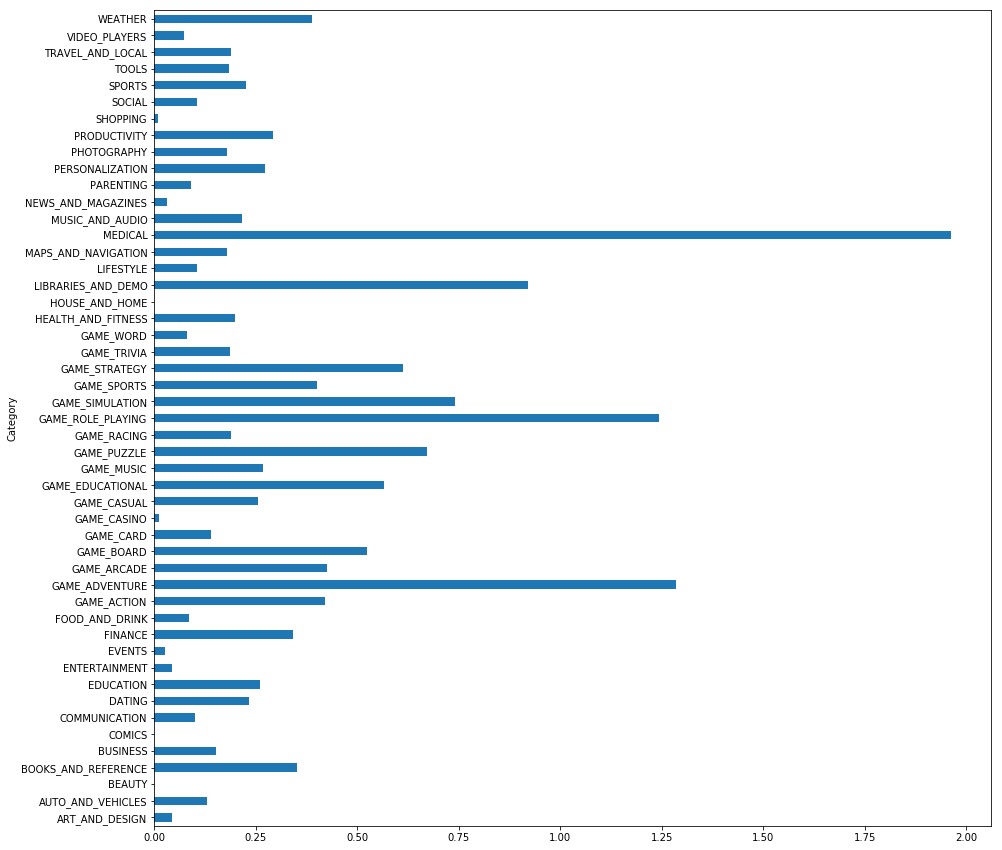

In [112]:
APPSDF['Price'].groupby(APPSDF['Category']).mean().plot(kind="barh", figsize=(15,15))

In [113]:
APPSDF['Size'].groupby(APPSDF['Category']).describe()

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
ART_AND_DESIGN,158.0,1.441709e+07,1.128527e+07,1200000.0,6150000.0,11000000.0,20000000.0,59000000.0
AUTO_AND_VEHICLES,203.0,2.398128e+07,2.045129e+07,1400000.0,6450000.0,17000000.0,38000000.0,95000000.0
BEAUTY,85.0,1.845765e+07,1.860299e+07,1800000.0,6100000.0,12000000.0,23000000.0,82000000.0
BOOKS_AND_REFERENCE,1517.0,1.484019e+07,1.625980e+07,20000.0,4300000.0,8700000.0,19000000.0,99000000.0
BUSINESS,924.0,1.727907e+07,1.665662e+07,27000.0,5800000.0,12000000.0,23000000.0,99000000.0
COMICS,74.0,3.082432e+07,2.422105e+07,2500000.0,8775000.0,24500000.0,53500000.0,91000000.0
COMMUNICATION,560.0,1.353271e+07,1.448283e+07,17000.0,4775000.0,8900000.0,17000000.0,105000000.0
DATING,98.0,1.540018e+07,1.148669e+07,18000.0,6500000.0,13000000.0,21000000.0,58000000.0
EDUCATION,3230.0,1.823180e+07,1.943390e+07,73000.0,5200000.0,11000000.0,24000000.0,102000000.0


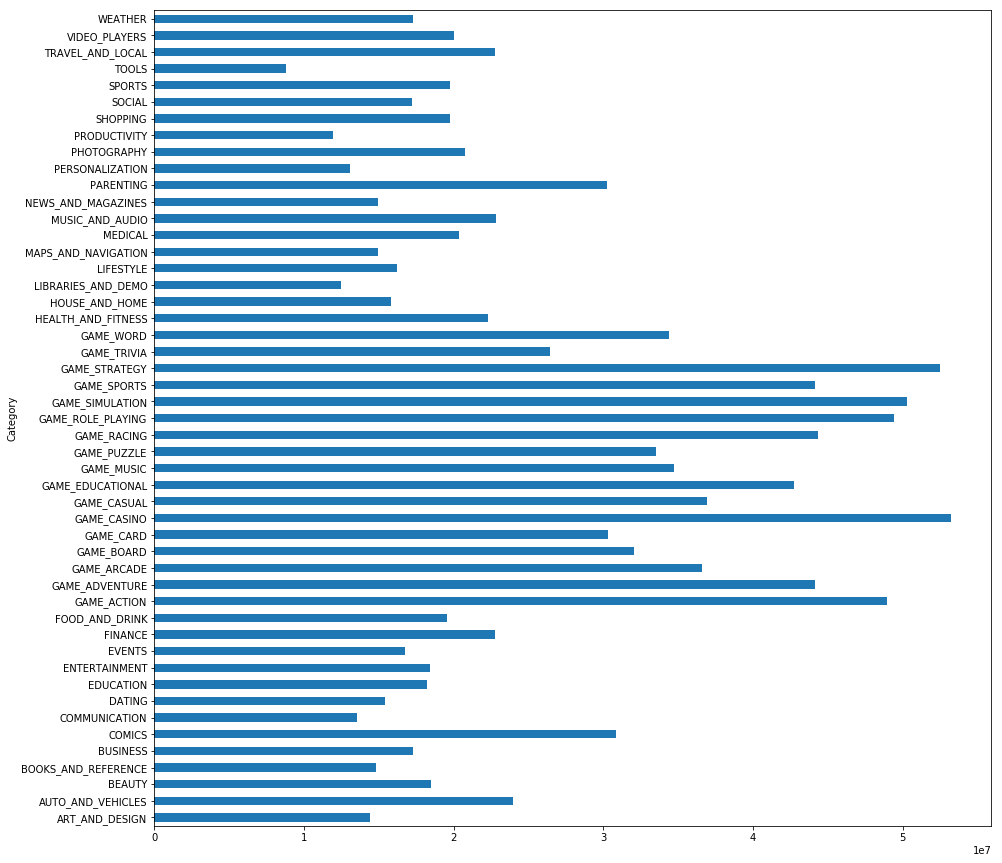

In [114]:
APPSDF['Size'].groupby(APPSDF['Category']).mean().plot(kind="barh", figsize=(15,15)) 

In [115]:
APPSDF['Reviews'].groupby(APPSDF['Category']).describe()

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
ART_AND_DESIGN,163.0,16056.815951,8.582746e+04,1.0,66.50,376.0,1374.00,960950.0
AUTO_AND_VEHICLES,222.0,9129.202703,2.813149e+04,1.0,86.00,758.0,4246.50,222190.0
BEAUTY,90.0,7100.900000,1.861540e+04,1.0,61.25,510.5,2949.25,123183.0
BOOKS_AND_REFERENCE,1639.0,18948.241611,1.225248e+05,1.0,90.00,582.0,4499.00,3182256.0
BUSINESS,1030.0,16482.866990,9.660100e+04,1.0,18.00,348.0,3474.75,1650169.0
COMICS,81.0,30256.333333,1.354176e+05,1.0,146.00,441.0,5184.00,1159950.0
COMMUNICATION,637.0,507912.701727,4.528073e+06,1.0,101.00,1127.0,17720.00,86214292.0
DATING,103.0,32856.475728,8.640011e+04,1.0,25.00,964.0,17925.00,548465.0
EDUCATION,3431.0,8851.615855,1.316156e+05,1.0,43.00,286.0,1890.50,7375938.0


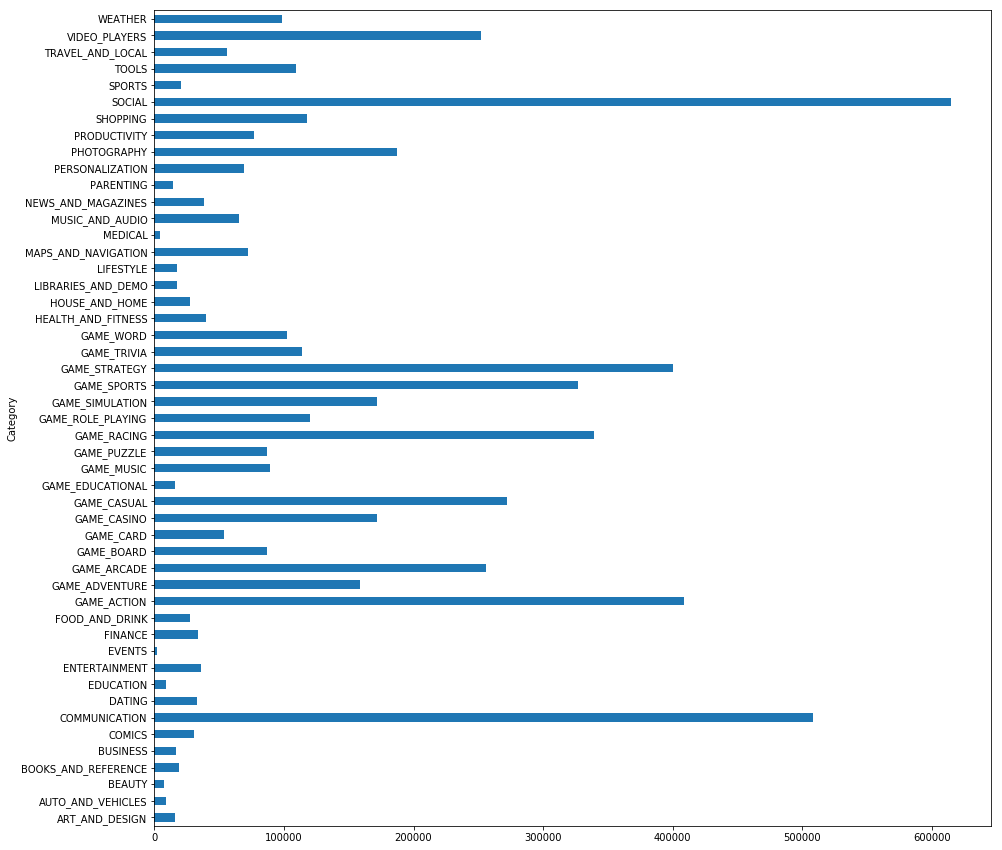

In [116]:
APPSDF['Reviews'].groupby(APPSDF['Category']).mean().plot(kind="barh", figsize=(15,15))

In [117]:
APPSDF['Installs'].groupby(APPSDF['Category']).describe()

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
ART_AND_DESIGN,163.0,1.182970e+06,7.999880e+06,50.0,10000.0,50000.0,100000.0,1.000000e+08
AUTO_AND_VEHICLES,222.0,8.967374e+05,2.061276e+06,10.0,10000.0,100000.0,1000000.0,1.000000e+07
BEAUTY,90.0,6.078851e+05,1.855707e+06,10.0,10000.0,100000.0,500000.0,1.000000e+07
BOOKS_AND_REFERENCE,1639.0,8.014129e+05,5.549865e+06,1.0,10000.0,100000.0,100000.0,1.000000e+08
BUSINESS,1030.0,1.133754e+06,6.911935e+06,1.0,1000.0,50000.0,100000.0,1.000000e+08
COMICS,81.0,1.260967e+06,2.472090e+06,5.0,10000.0,100000.0,1000000.0,1.000000e+07
COMMUNICATION,637.0,1.918647e+07,1.169632e+08,1.0,10000.0,100000.0,1000000.0,1.000000e+09
DATING,103.0,1.125081e+06,2.507392e+06,5.0,5000.0,100000.0,1000000.0,1.000000e+07
EDUCATION,3431.0,3.161610e+05,2.153384e+06,0.0,5000.0,50000.0,100000.0,1.000000e+08


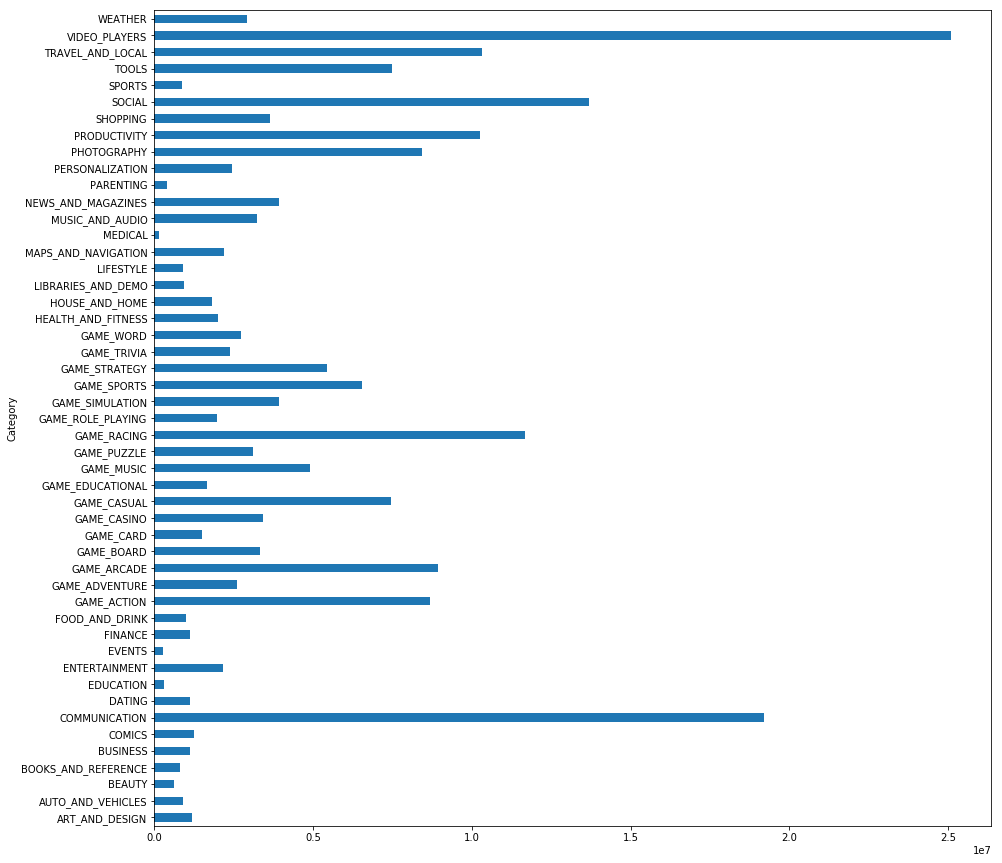

In [118]:
APPSDF['Installs'].groupby(APPSDF['Category']).mean().plot(kind="barh", figsize=(15,15))

(0.0, 100.99)

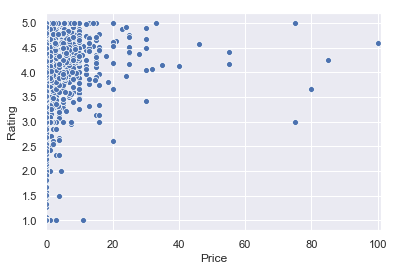

In [119]:
sns.set(style='darkgrid')
sns.scatterplot(x=APPSDF['Price'], y=APPSDF['Rating'])
plt.xlim((0.00,100.99))

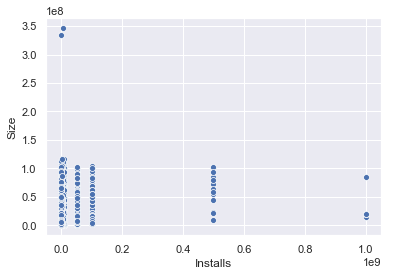

In [121]:
sns.set(style='darkgrid')
sns.scatterplot(x=APPSDF['Installs'], y=APPSDF['Size'])

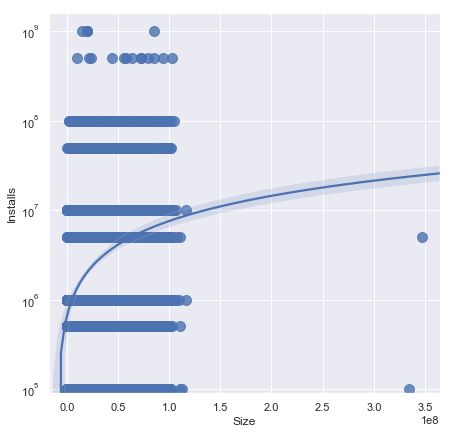

In [122]:
f, ax = plt.subplots(figsize=(7, 7))
ax.set(yscale="log")
sns.regplot("Size", "Installs", data=APPSDF, ax=ax, scatter_kws={"s": 100})

In [123]:

# the command below means that the output of multiple commands in a cell will be output at once.

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [124]:
export_csv = APPSDF.to_csv (r'C:\Users\Tasha PC\Documents\Data Science\google-playstore-apps\APPSDF.csv')